In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-26 / Aki Taanila


## 6/7 Värit ja värikartat

Värejä voit vaihtaa yksi kerrallaan värin nimen, RGB-koodin tai HEX-koodin mukaan.

* Värien nimiä https://matplotlib.org/stable/gallery/color/named_colors.html.
* Värien koodeja https://www.w3schools.com/colors/colors_picker.asp.

Voit vaihtaa myös käytettävän värikartan.

* Värikarttoja https://matplotlib.org/stable/tutorials/colors/colormaps.html.

Nykyisessä versiossa oletusvärit määritellään HEX-koodeina. Esimerkiksi pylväskaaviossa ensimmäinen arvosarja esitetään ensimmäisen värin mukaisesti, toinen arvosarja toisen värin mukaisesesti jne. HEX-koodin sijasta voit viitata oletusväreihin lyhyemmin 'C0', 'C1', 'C2' jne.

Seuraavassa käytän esimerkkinä 5-portaisella asteikolla mitattuja tyytyväisyyksiä johtoon, työtovereihin, työympäristöön, palkkaan ja työtehtäviin. Laadin ensin prosenttitaulukon, johon on koottuna vastaukset prosentteina ja kuvaan ne pinottuna pylväskaaviona. Kaavioiden muotoiluun en tässä kiinnitä huomiota, vaan keskityn väreihin.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Taulukon laskeminen.
df1 = df['johto'].value_counts(normalize=True).sort_index().to_frame('johtoon')
df1['työtovereihin'] = df['työtov'].value_counts(sort=False, normalize=True)
df1['työympäristöön'] = df['työymp'].value_counts(sort=False, normalize=True)
df1['palkkaan'] = df['palkkat'].value_counts(sort=False, normalize=True)
df1['työtehtäviin'] = df['työteht'].value_counts(sort=False, normalize=True)
df1.index = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
               'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']
df1 = df1.T * 100
df1.style.format('{:.1f} %', na_rep='-')

,Erittäin tyytymätön,Jokseenkin tyytymätön,Ei tyytymätön eikä tyytyväinen,Jokseenkin tyytyväinen,Erittäin tyytyväinen
johtoon,8.5 %,19.5 %,36.6 %,28.0 %,7.3 %
työtovereihin,-,3.7 %,19.8 %,43.2 %,33.3 %
työympäristöön,11.0 %,11.0 %,36.6 %,28.0 %,13.4 %
palkkaan,40.2 %,23.2 %,23.2 %,12.2 %,1.2 %
työtehtäviin,6.1 %,18.3 %,35.4 %,30.5 %,9.8 %


### Kaavio oletusväreillä

Jos et määritä värejä, niin käytössä ovat 5 ensimmäistä oletusväriä.

In [5]:
print('Oletusvärien HEX-koodit:\n', plt.rcParams['axes.prop_cycle'].by_key()['color'])

Oletusvärien HEX-koodit:
 ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Text(0.5, 1.0, 'Kaavio oletusväreillä')

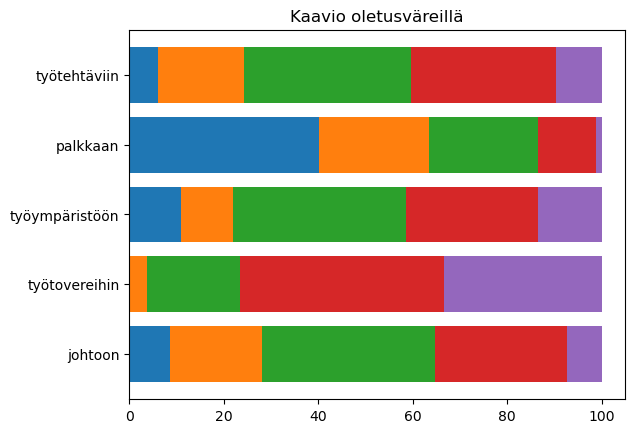

In [6]:
df1.plot(kind='barh', stacked=True, width=0.8, legend=False)
plt.title('Kaavio oletusväreillä')

### Omat värit listana

Voit määrittää käytettävät värit listana käyttäen värien nimiä, RGB-koodeja tai HEX-koodeja. Värit voit määrittää **color**-parametrina.

<Axes: >

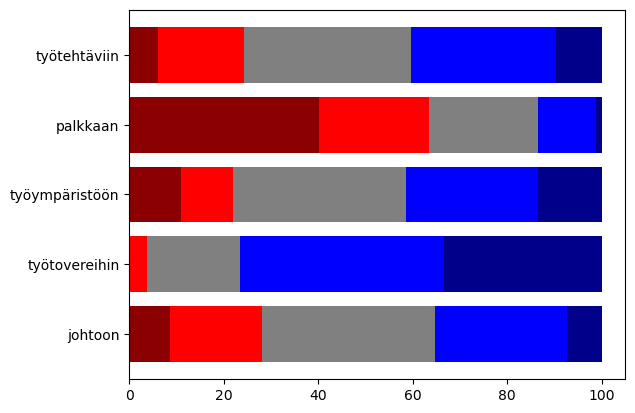

In [7]:
colors = ['darkred', 'red', 'gray', 'blue', 'darkblue']
df1.plot(kind='barh', stacked=True, width=0.8, legend=False, color=colors)

### Värikartan eli paletin käyttö

Voit määrittää käytettävän värikartan **colormap**-parametrina. **Seaborn**-kaavioissa vastaava parametri on nimeltään **palette**.

<Axes: >

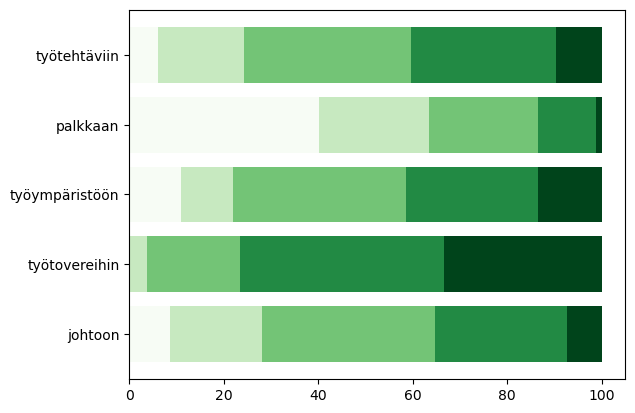

In [8]:
# Esimerkki sequential-tyyppisestä värikartasta.
df1.plot(kind='barh', stacked=True, width=0.8, legend=False, colormap='Greens')

<Axes: >

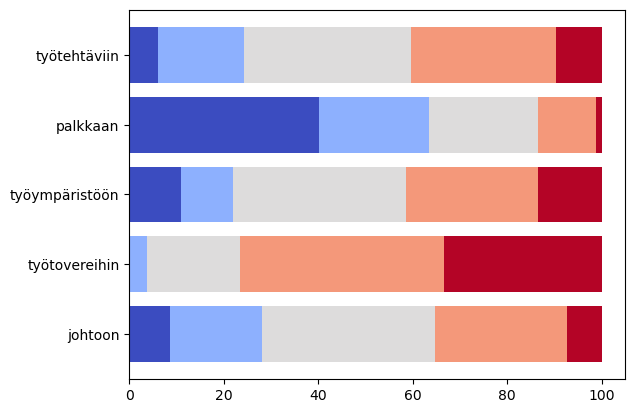

In [9]:
# Esimerkki diverging-tyyppisestä värikartasta.
df1.plot(kind='barh', stacked=True, width=0.8, legend=False, colormap='coolwarm')

<Axes: >

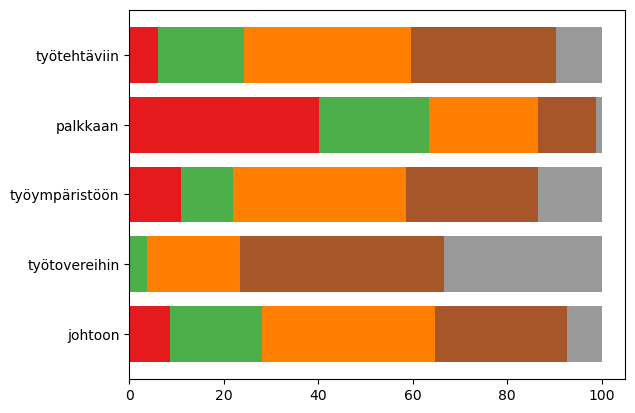

In [10]:
# Esimerkki qualitative-tyyppisestä värikartasta.
df1.plot(kind='barh', stacked=True, width=0.8, legend=False, colormap='Set1')

### Värikartan värialueen supistaminen

Esimerkkikaavioissamme värikartasta poimitaan tasaisin välein viisi väriä. Voit
supistaa värikarttaa rajaamalla alkuperäisen värialueen 0 - 1 suppeammaksi, esimerkiksi 0.2 - 0.8.

<Axes: >

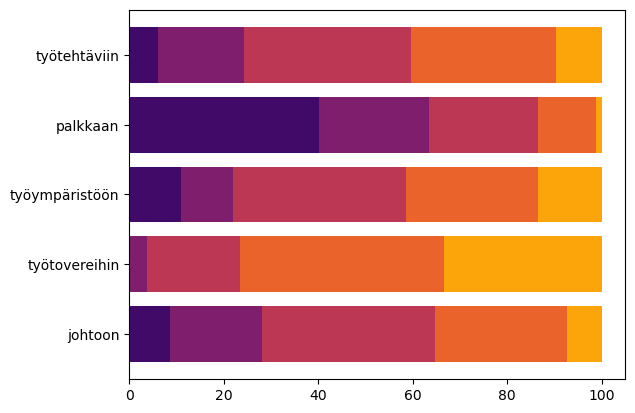

In [11]:
# Viisi väriä inferno-värikartan alueelta 0.2 - 0.8.
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 5))
df1.plot(kind='barh', stacked=True, width=0.8, legend=False, color=colors)

<Axes: >

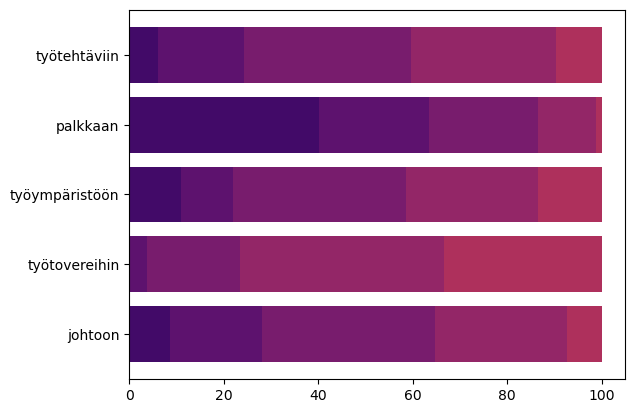

In [12]:
# Jos valitset viiden sijasta kymmenen väriä, niin viiden värin kuvioon otetaan vain viisi ensimmäistä väriä.
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 10))
df1.plot(kind='barh', stacked=True, width=0.8, legend=False, color=colors)

### Lisätietoa

Seuraavassa osassa käsitellään kaavion oletusparametreja:

- [Oletusparametrit](https://github.com/taanila/kaaviot/blob/master/matplotlib7.ipynb)

Löydät kaikki muistiot osoitteesta https://tilastoapu.wordpress.com/python.